# 对多分类任务中的模型评估隐藏层层数和隐藏单元个数对实验结果的影响
使用不同的隐藏层层数和隐藏单元个数，进行对比实验并分析实验结果

定义一个通用的神经网络结构，允许通过参数来控制隐藏层的数量和每层的单元数。

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import time
from torchvision import datasets, transforms

In [2]:
# 数据路径
mnist_data_path = r'C:\Users\37623\jupyter_test\Lab2_Nerual_Network\dataset\MNIST_data'

# 1. 定义可变隐藏层的前馈神经网络模型

In [3]:
class VariableHiddenLayerNN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_layers):
        super(VariableHiddenLayerNN, self).__init__()
        layers = []
        prev_dim = input_dim
        
        for hidden_units in hidden_layers:
            layers.append(nn.Linear(prev_dim, hidden_units))
            layers.append(nn.ReLU())  # 使用 ReLU 作为激活函数
            prev_dim = hidden_units
        
        layers.append(nn.Linear(prev_dim, output_dim))  # 输出层
        self.network = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.network(x)

# 2. 训练和测试函数

In [4]:
def train_and_evaluate(model, criterion, optimizer, train_loader, test_loader, num_epochs=10):
    train_loss_list, test_loss_list = [], []
    train_acc_list, test_acc_list = [], []
    start_time = time.time()
    
    for epoch in range(num_epochs):
        model.train()
        total_loss, correct = 0, 0
        
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * inputs.size(0)
            
            # 计算训练准确度
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == targets).sum().item()
        
        train_loss = total_loss / len(train_loader.dataset)
        train_loss_list.append(train_loss)
        train_acc = correct / len(train_loader.dataset)
        train_acc_list.append(train_acc)
        
        # 测试模式
        model.eval()
        total_loss, correct = 0, 0
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                total_loss += loss.item() * inputs.size(0)
                preds = torch.argmax(outputs, dim=1)
                correct += (preds == targets).sum().item()
        
        test_loss = total_loss / len(test_loader.dataset)
        test_loss_list.append(test_loss)
        test_acc = correct / len(test_loader.dataset)
        test_acc_list.append(test_acc)
        
        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
    
    total_time = time.time() - start_time
    return train_loss_list, test_loss_list, train_acc_list, test_acc_list, total_time

# 3. 加载 MNIST 数据集

In [5]:
def load_mnist_data(path):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
    train_data = datasets.MNIST(root=path, train=True, download=True, transform=transform)
    test_data = datasets.MNIST(root=path, train=False, download=True, transform=transform)
    return train_data, test_data

# 4. 训练和可视化

Epoch 1/10 - Train Loss: 0.3336, Test Loss: 0.1839
Epoch 2/10 - Train Loss: 0.1631, Test Loss: 0.1368
Epoch 3/10 - Train Loss: 0.1174, Test Loss: 0.1192
Epoch 4/10 - Train Loss: 0.0939, Test Loss: 0.0995
Epoch 5/10 - Train Loss: 0.0777, Test Loss: 0.0978
Epoch 6/10 - Train Loss: 0.0656, Test Loss: 0.0981
Epoch 7/10 - Train Loss: 0.0566, Test Loss: 0.0935
Epoch 8/10 - Train Loss: 0.0482, Test Loss: 0.0836
Epoch 9/10 - Train Loss: 0.0418, Test Loss: 0.0828
Epoch 10/10 - Train Loss: 0.0361, Test Loss: 0.0878


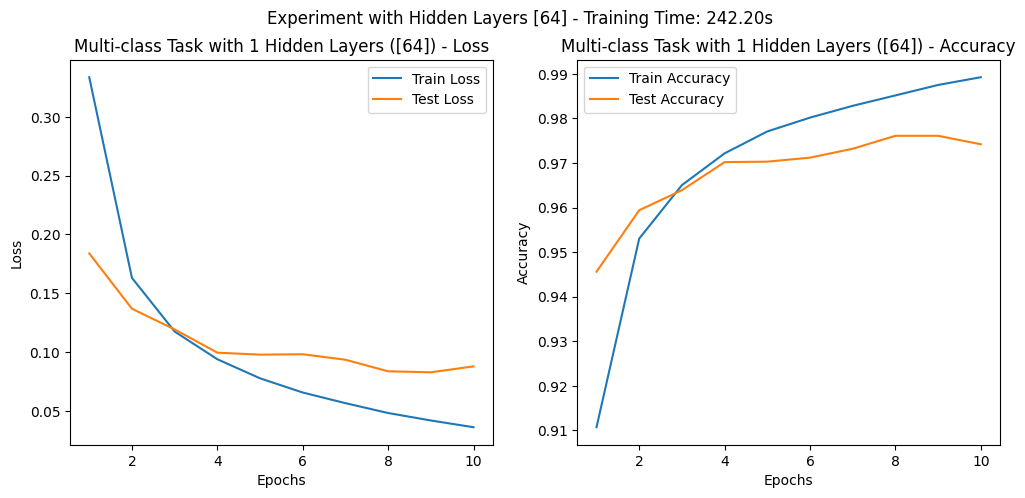

Epoch 1/10 - Train Loss: 0.2898, Test Loss: 0.1365
Epoch 2/10 - Train Loss: 0.1215, Test Loss: 0.0992
Epoch 3/10 - Train Loss: 0.0833, Test Loss: 0.0858
Epoch 4/10 - Train Loss: 0.0610, Test Loss: 0.0899
Epoch 5/10 - Train Loss: 0.0483, Test Loss: 0.0878
Epoch 6/10 - Train Loss: 0.0393, Test Loss: 0.0777
Epoch 7/10 - Train Loss: 0.0324, Test Loss: 0.0757
Epoch 8/10 - Train Loss: 0.0264, Test Loss: 0.0884
Epoch 9/10 - Train Loss: 0.0224, Test Loss: 0.0922
Epoch 10/10 - Train Loss: 0.0206, Test Loss: 0.1023


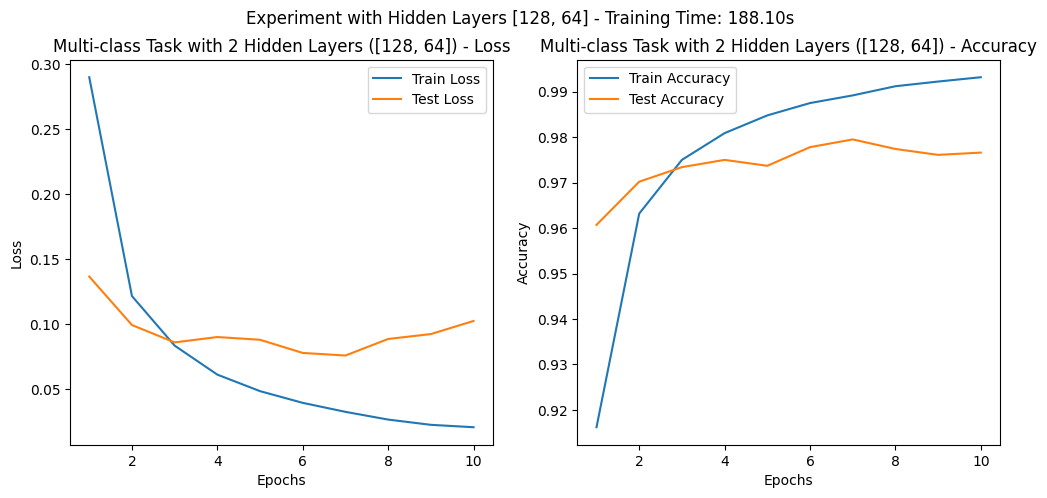

Epoch 1/10 - Train Loss: 0.2684, Test Loss: 0.1232
Epoch 2/10 - Train Loss: 0.1042, Test Loss: 0.0945
Epoch 3/10 - Train Loss: 0.0705, Test Loss: 0.0868
Epoch 4/10 - Train Loss: 0.0532, Test Loss: 0.0696
Epoch 5/10 - Train Loss: 0.0414, Test Loss: 0.0742
Epoch 6/10 - Train Loss: 0.0354, Test Loss: 0.0869
Epoch 7/10 - Train Loss: 0.0299, Test Loss: 0.0865
Epoch 8/10 - Train Loss: 0.0252, Test Loss: 0.0937
Epoch 9/10 - Train Loss: 0.0237, Test Loss: 0.0837
Epoch 10/10 - Train Loss: 0.0212, Test Loss: 0.0771


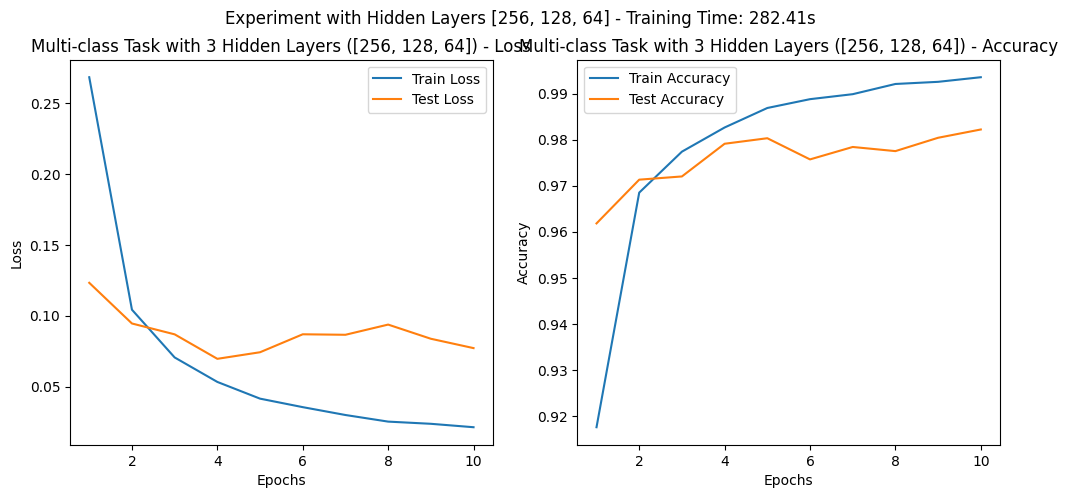

Epoch 1/10 - Train Loss: 0.2574, Test Loss: 0.1256
Epoch 2/10 - Train Loss: 0.1018, Test Loss: 0.1200
Epoch 3/10 - Train Loss: 0.0720, Test Loss: 0.0883
Epoch 4/10 - Train Loss: 0.0567, Test Loss: 0.0795
Epoch 5/10 - Train Loss: 0.0440, Test Loss: 0.1252
Epoch 6/10 - Train Loss: 0.0365, Test Loss: 0.0801
Epoch 7/10 - Train Loss: 0.0317, Test Loss: 0.0806
Epoch 8/10 - Train Loss: 0.0296, Test Loss: 0.0907
Epoch 9/10 - Train Loss: 0.0248, Test Loss: 0.0885
Epoch 10/10 - Train Loss: 0.0232, Test Loss: 0.0967


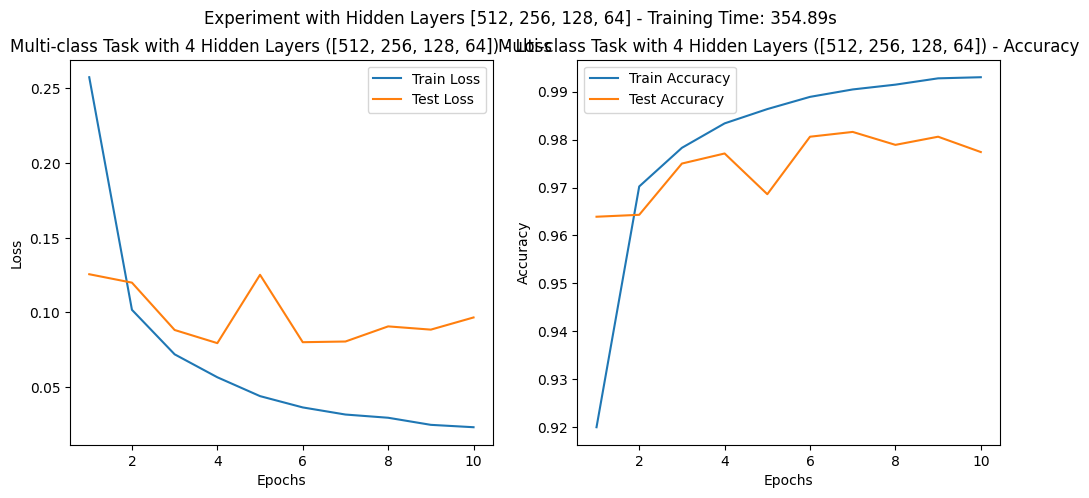

In [6]:
def run_experiment(hidden_layers, num_epochs=10):
    train_dataset, test_dataset = load_mnist_data(mnist_data_path)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    model = VariableHiddenLayerNN(input_dim=784, output_dim=10, hidden_layers=hidden_layers)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    train_loss, test_loss, train_acc, test_acc, total_time = train_and_evaluate(model, criterion, optimizer, train_loader, test_loader, num_epochs)
    
    # 可视化训练过程
    epochs = range(1, num_epochs + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, label='Train Loss')
    plt.plot(epochs, test_loss, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Multi-class Task with {len(hidden_layers)} Hidden Layers ({hidden_layers}) - Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_acc, label='Train Accuracy')
    plt.plot(epochs, test_acc, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Multi-class Task with {len(hidden_layers)} Hidden Layers ({hidden_layers}) - Accuracy')
    plt.legend()
    
    plt.suptitle(f'Experiment with Hidden Layers {hidden_layers} - Training Time: {total_time:.2f}s')
    plt.show()

# 执行实验，使用不同的隐藏层配置
run_experiment([64], num_epochs=10)           # 1曾隐藏层单元数为64
run_experiment([128, 64], num_epochs=10)       # 2层隐藏层，单元数为128和64
run_experiment([256, 128, 64], num_epochs=10)  # 3层隐藏层，单元数为256, 128和64
run_experiment([512, 256, 128, 64], num_epochs=10)  # 4层隐藏层，单元数为512, 256, 128和64